# WeatherPy
----

#### Analysis

The weather is warmer closer to the equator and as we move further from it the temperture decreases. Right now, Europe, Asia, the Pacific Ocean, North America, and the Atlantic are pretty cold. 

There doesn't appear to be a coorelation between cloudiness and latitude, but there are signicant groups of cities at 100% and 0% cloudiness.

There really is no coorelation between wind speed and latitude. Most wind speed is under 10 MPH. But there is a city at 70 MPH.

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy #https://pypi.org/project/citipy/

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [38]:

# Open Weather Map API Call base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}"
# print(url)

# Create list to store city data
city_data = []

# Print log of each city as it's being processed 

# Header
print("-------------------")
print("Begin Data Pull")
print("-------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through cities
for index, city in enumerate(cities):
    
    # Group cities
    if (index % 50 == 0 and index >= 50):
            set_count += 1
            record_count = 0
            
    # Create unique URL addendums for each city
    city_url = url + "&q=" + city

    # Show URL record and set number
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    record_count +=1
    
    # Request cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Extract data we need
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Add data to the city_data list
        city_data.append({
            "City":city,
            "Lat":city_lat,
            "Lng":city_lng,            
            "Max Temp":city_max_temp,
            "Humidity":city_humidity,
            "Cloudiness":city_clouds,
            "Wind Speed":city_wind,
            "Country":city_country,
            "Date":city_date
        })
    except:
        print("City not found. Skipping....")
        pass

# Footer 
print("-------------------")
print("End Data Pull")   
print("-------------------")


# # # # IGNORE ALL THIS TO BOTTOM OF CELL
# # # Set up lists to hold response info
# # city = []
# # city_lon = []
# # city_lat = []
# # city_temp = []
# # city_humidity = []
# # city_wind = []
# # city_clouds = []
# # city_id = []
# # city_name = []
# # city_country = []
# # date_time = []

# # # In-class examples
# # # Loop through the list of cities and perform a request for data on each
# # # for city in cities:
# # #     response = requests.get(query_url + city).json()
# # #     lat.append(response['coord']['lat'])
# # #     temp.append(response['main']['temp'])
# # # ------------------------------------
# # # # Try to access key that doesn't exist
# # # try:
# # #     students["Jezebel"]
# # # except KeyError:
# # #     print("Oops, that key doesn't exist.")


# # # Loop through the list of cities and perform a request for data on each
# # for city in range(len(cities)):
# #     try:
# #         response = requests.get(query_url + "&q=" + cities[city]).json()
# #         city_id.append(response['id'])
# #         city_name.append(response['name'])
# #         country.append(response['sys']['country'])
# #         date_time.append(time.strftime('%m/%d/%Y %H:%M:%S', time.localtime(response['dt'])))
# #         lat.append(response['coord']['lat'])
# #         lon.append(response['coord']['lon'])
# #         temp.append(response['main']['temp_max'])
# #         humidity.append(response['main']['humidity'])
# #         wind.append(response['wind']['speed'])
# #         clouds.append(response['clouds']['all'])
# #         print ('Processing City = ' + response['name'] + ' Id = ' + str(response['id']))
# #     except:
# #         continue
        
# # # Print the length of city_name array to see how many cities are left with no errors        
# # print (city_name)

-------------------
Begin Data Pull
-------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | freeport
Processing Record 5 of Set 1 | saint-pierre
Processing Record 6 of Set 1 | souillac
Processing Record 7 of Set 1 | airai
Processing Record 8 of Set 1 | tsihombe
City not found. Skipping....
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | nampula
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | bubaque
Processing Record 13 of Set 1 | mangaratiba
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | general roca
Processing Record 16 of Set 1 | udalo
City not found. Skipping....
Processing Record 17 of Set 1 | puerto quijarro
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping....
Processing Record 20 of Set 1 | fairbanks
Processing Record 21 of Set 1 | vrang

Processing Record 34 of Set 4 | korla
Processing Record 35 of Set 4 | port moresby
Processing Record 36 of Set 4 | chagda
City not found. Skipping....
Processing Record 37 of Set 4 | cherskiy
Processing Record 38 of Set 4 | shenzhen
Processing Record 39 of Set 4 | kasongo-lunda
Processing Record 40 of Set 4 | nizhneyansk
City not found. Skipping....
Processing Record 41 of Set 4 | labuhan
Processing Record 42 of Set 4 | alta floresta
Processing Record 43 of Set 4 | suntar
Processing Record 44 of Set 4 | kabare
Processing Record 45 of Set 4 | port-gentil
Processing Record 46 of Set 4 | luanda
Processing Record 47 of Set 4 | severo-kurilsk
Processing Record 48 of Set 4 | mar del plata
Processing Record 49 of Set 4 | deputatskiy
Processing Record 0 of Set 5 | clyde river
Processing Record 1 of Set 5 | cabo san lucas
Processing Record 2 of Set 5 | marquette
Processing Record 3 of Set 5 | bousso
Processing Record 4 of Set 5 | pachora
Processing Record 5 of Set 5 | afmadu
City not found. Ski

Processing Record 22 of Set 8 | bengkulu
Processing Record 23 of Set 8 | codrington
Processing Record 24 of Set 8 | san isidro
Processing Record 25 of Set 8 | sangamner
Processing Record 26 of Set 8 | carbonia
Processing Record 27 of Set 8 | gamba
Processing Record 28 of Set 8 | copalillo
Processing Record 29 of Set 8 | mentok
City not found. Skipping....
Processing Record 30 of Set 8 | veinticinco de mayo
Processing Record 31 of Set 8 | sept-iles
Processing Record 32 of Set 8 | chapais
Processing Record 33 of Set 8 | rungata
City not found. Skipping....
Processing Record 34 of Set 8 | umm lajj
Processing Record 35 of Set 8 | requena
Processing Record 36 of Set 8 | ilulissat
Processing Record 37 of Set 8 | aasiaat
Processing Record 38 of Set 8 | vestmannaeyjar
Processing Record 39 of Set 8 | hofn
Processing Record 40 of Set 8 | itarema
Processing Record 41 of Set 8 | port hawkesbury
Processing Record 42 of Set 8 | barawe
City not found. Skipping....
Processing Record 43 of Set 8 | leh


Processing Record 6 of Set 12 | burdur
Processing Record 7 of Set 12 | jizan
Processing Record 8 of Set 12 | plumlov
Processing Record 9 of Set 12 | henties bay
Processing Record 10 of Set 12 | buritizeiro
Processing Record 11 of Set 12 | bull savanna
Processing Record 12 of Set 12 | manono
Processing Record 13 of Set 12 | gigmoto
Processing Record 14 of Set 12 | shakiso
Processing Record 15 of Set 12 | abnub
Processing Record 16 of Set 12 | encarnacion
Processing Record 17 of Set 12 | montepuez
Processing Record 18 of Set 12 | baikunthpur
Processing Record 19 of Set 12 | aksarayskiy
Processing Record 20 of Set 12 | burnie
Processing Record 21 of Set 12 | kurchum
Processing Record 22 of Set 12 | lubaczow
Processing Record 23 of Set 12 | russell
Processing Record 24 of Set 12 | portland
Processing Record 25 of Set 12 | kapoeta
Processing Record 26 of Set 12 | college
Processing Record 27 of Set 12 | winnemucca
Processing Record 28 of Set 12 | nadvoitsy
Processing Record 29 of Set 12 | b

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
# Create dataframe
city_data_df = pd.DataFrame(city_data)

# Export data to cities.csv
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df.count()


# # # # IGNORE ALL THIS TO BOTTOM OF CELL

# city_data_df = pd.DataFrame(city_data)

# # add a column
# df['City'] = city_name
# df['Country'] = country
# df['Date_Time'] = date_time
# df['Latitude'] = lat
# df['Longitude'] = lon
# df['Max_Temperature'] = temp
# df['Humidity'] = humidity
# df['Wind'] = wind
# df['Clouds'] = clouds

# city_data_df.head()



# # df.to_csv(output_data_file, index=False)
# # df.head()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [16]:
# Display the city dataframe
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,78.03,79,0,16.96,PF,1579318852
1,mataura,-46.19,168.86,75.69,43,100,1.39,NZ,1579318889
2,albany,42.60,-73.97,12.20,51,40,10.29,US,1579318889
3,freeport,40.66,-73.58,24.80,34,1,8.05,US,1579318358
4,saint-pierre,-21.34,55.48,86.00,66,100,2.24,RE,1579318889


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

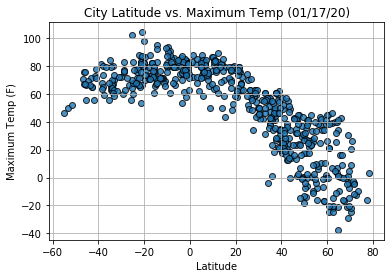

In [34]:
# Build scatterplot for lat vs temp

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidth=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate other graph properties
plt.title(f"City Latitude vs. Maximum Temp (%s)" %time.strftime("%x"))
plt.ylabel("Maximum Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the graph
plt.savefig("output_data/lat_vs_temp.png")

# Show plot
plt.show()

# # # # IGNORE ALL THIS TO BOTTOM OF CELL
# # scatter plot example

# # Build a scatter plot for each data type
# plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# # Incorporate the other graph properties
# plt.title("Temperature in World Cities")
# plt.ylabel("Temperature (Celsius)")
# plt.xlabel("Latitude")
# plt.grid(True)

# # Save the figure
# plt.savefig("TemperatureInWorldCities.png")

# # Show plot
# plt.show()

#### Latitude vs. Humidity Plot

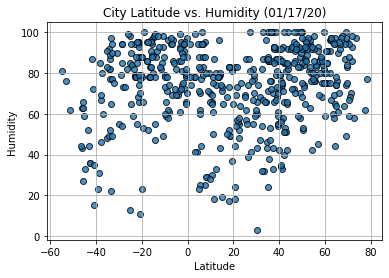

In [35]:
# Build scatterplot for latitude vs humidity

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidth=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate other graph properties
plt.title(f"City Latitude vs. Humidity (%s)" %time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the graph
plt.savefig("output_data/lat_vs_hum.png")

# Show plot
plt.show()


#### Latitude vs. Cloudiness Plot

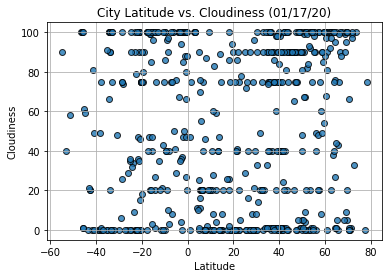

In [36]:
# Build scatterplot for latitude vs cloudiness

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidth=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate other graph properties
plt.title(f"City Latitude vs. Cloudiness (%s)" %time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the graph
plt.savefig("output_data/lat_vs_cloud.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

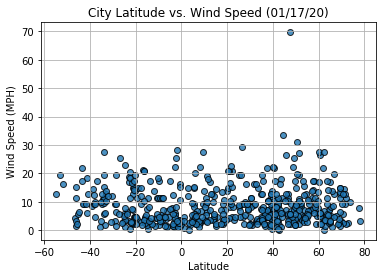

In [37]:
# Build scatterplot for latitude vs humidity

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidth=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate other graph properties
plt.title(f"City Latitude vs. Wind Speed (%s)" %time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the graph
plt.savefig("output_data/lat_vs_wind.png")

# Show plot
plt.show()


## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression